<a href="https://colab.research.google.com/github/yangjik/yang.study/blob/main/05_K_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80(%EC%A7%81%EC%84%A0%EA%B7%B8%EB%9E%98%ED%94%84)%2C_%EB%8B%A4%ED%95%AD%ED%9A%8C%EA%B7%80(2%EC%B0%A8%EB%B0%A9%EC%A0%95%EC%8B%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>K-최근접 이웃 선형회귀</h3>


<br><br><br>

In [ ]:
# 사전데이터
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# train, test 데이터 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

# train, test 2차원으로 만들기
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1, 1)

In [ ]:
# 최근접이웃 개수는 3개로하고 학습
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)


KNeighborsRegressor(n_neighbors=3)

In [ ]:
# [[50, x]] 예측하기
knr.predict([[50]])

array([1033.33333333])

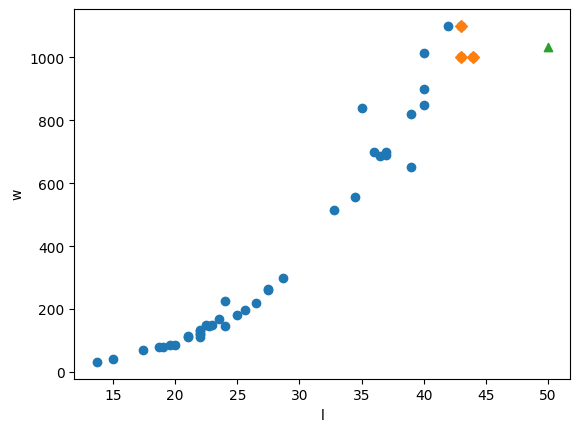

In [ ]:
# 전체 데이터 그래프로 확인
import matplotlib.pyplot as plt

# 50cm 이웃을 구하기
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50,1033, marker='^')

plt.xlabel('l')
plt.ylabel('w')
plt.show()

In [ ]:
# 이웃 샘플의 평균구하기
np.mean(train_target[indexes])

1033.3333333333333

In [ ]:
knr.predict([[100]])

array([1033.33333333])

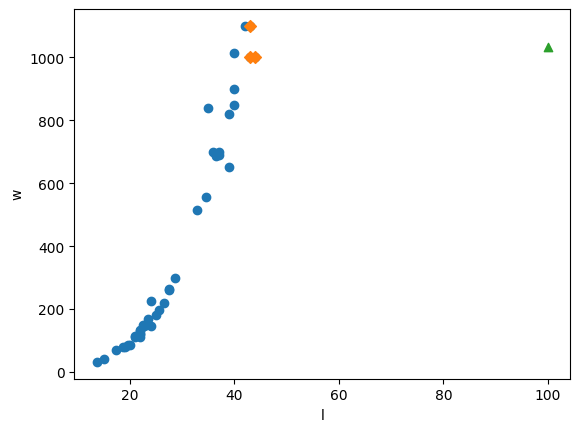

In [ ]:
# [[100, x]] 에서 이웃점 확인
distances, indexes = knr.kneighbors([[100]])

# 훈련데이터의 산점도그래프확인

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')    # 이웃점

plt.scatter(100, 1033, marker='^')

plt.xlabel('l')
plt.ylabel('w')
plt.show()

K-최근접 이웃 회귀<br>
단점 : 데이터셋의 기준으로 하다보니까 가장 큰값은 고정되어있다.<br><br>


<h3>K-최근접 이웃 선형회귀</h3>

- 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘.

<br><br><br>

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

lr.predict([[50]])

array([1241.83860323])

선형회귀는 1차방정식으로 구성되어있다.<br>
공식 : y = ax + b

In [ ]:
# 위 공식에서 a, b를 확인하는 방법
a = lr.coef_
b = lr.intercept_
print(a, b)

[39.01714496] -709.0186449535477


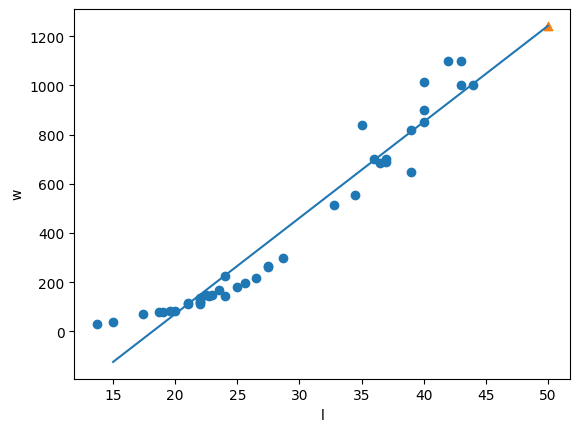

In [ ]:
# train 산점도 확인
plt.scatter(train_input, train_target)

# 위에 구한 a, b이용해서 1차방정식 그려보기
# 밑에 [15, 50]은 15 부터 50cm
plt.plot([15, 50], [15 * a +b, 50 * a +b])

# [50, 1241.8] 그래프에 찍기
plt.scatter(50, 1241.8, marker='^')

plt.xlabel('l')
plt.ylabel('w')
plt.show()

In [ ]:
# 결정계수 r제곱 확인
lr.score(train_input, train_target)

0.939846333997604

In [ ]:
lr.score(test_input, test_target)

0.8247503123313558

<h3>다항 회귀</h3>

- 데이터를 제곱한 항이 훈련세트에 추가되어야한다.(기존 데이터에 꼭 붙이기!!)
-

In [ ]:
# 데이터 제곱해서 데이터 만들기(train, test)
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [ ]:
print(train_poly, train_poly.shape)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]] (42, 2)


In [ ]:
print(test_poly, test_poly.shape)

[[  70.56    8.4 ]
 [ 324.     18.  ]
 [ 756.25   27.5 ]
 [ 453.69   21.3 ]
 [ 506.25   22.5 ]
 [1600.     40.  ]
 [ 900.     30.  ]
 [ 605.16   24.6 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [1892.25   43.5 ]
 [ 262.44   16.2 ]
 [ 784.     28.  ]
 [ 745.29   27.3 ]] (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

lr.predict([[50 **2, 50]])

array([1573.98423528])

In [ ]:
# 계수, 절편 확인
lr.coef_, lr.intercept_

(array([  1.01433211, -21.55792498]), 116.0502107827827)

결론

- y = (1.01 * length**2 ) - (21.6 * length) + 116.5
- 위 방정식으로 그래프가 그려진다.

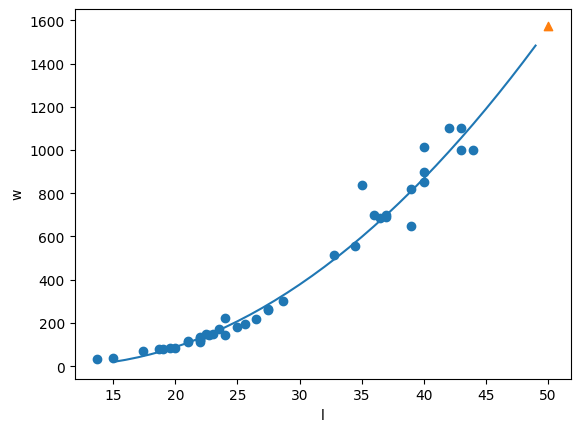

In [ ]:
# 방정식 시각화
point = np.arange(15, 50)                                 # 구간별 직선을 그리기위해 배열선언

plt.scatter(train_input, train_target)                    # train 데이터
plt.plot(point, 1.01 * point**2 - 21.6 * point + 116.5)   # 위에서 만든 배열 2차방정식 그리기

plt.scatter(50,1574, marker='^')                          # 농어데이터.
plt.xlabel('l')
plt.ylabel('w')
plt.show()

In [ ]:
# 모델 평가하기
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


위에 결과를 보면 훈련데이터셋 평가율이 더 높기때문에 과소적합이 있다.